# Breast Cancer Diagnosis Prediction Project Documentation

## Introduction
This documentation presents a comprehensive overview of a breast cancer diagnosis prediction project using machine learning techniques. The project aims to develop a predictive model to classify breast tumors as benign or malignant based on various features extracted from diagnostic images.

## Data Preprocessing
### Outlier Detection and Removal
Outliers in the dataset were detected and removed using z-scores. Outliers are data points that significantly differ from the rest of the data and can potentially skew the results of the analysis. The z-score method calculates the number of standard deviations a data point is from the mean and identifies outliers based on a predefined threshold. In this project, outliers exceeding a threshold of 3 standard deviations were considered and subsequently removed from the dataset to ensure the robustness of the analysis.

### Visualization
To gain insights into the data and understand the relationships between features, correlation heatmaps and pairwise joint plots were generated. The correlation heatmap visualizes the pairwise correlations between features in the dataset, providing valuable information about potential relationships and dependencies. Pairwise joint plots allow for the visualization of the distributions of individual features and their relationships with one another. These visualizations aid in feature selection and engineering, as well as in understanding the underlying patterns in the data.

## Feature Selection and Engineering
### Domain Knowledge
Features relevant to breast cancer diagnosis were selected based on domain knowledge and consultation with medical experts. Features such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension are known to be important in diagnosing breast tumors.

### Normalization/Standardization
Selected features were normalized or standardized to ensure that they have a similar scale and distribution. Standardization involves transforming the data to have a mean of 0 and a standard deviation of 1, which helps in improving the convergence rate of machine learning algorithms.

### Dimensionality Reduction (Optional)
Principal Component Analysis (PCA) was used for dimensionality reduction to reduce the number of features while preserving most of the information in the data. PCA transforms the original features into a lower-dimensional space, where each dimension (principal component) represents a combination of the original features. This reduces the computational complexity of the model and helps in avoiding overfitting.

## Machine Learning Model (SVM)
### Support Vector Machine (SVM)
A Support Vector Machine (SVM) classifier was chosen for breast cancer diagnosis prediction. SVM is a powerful supervised learning algorithm that works well for both linear and nonlinear classification tasks. In this project, a linear kernel SVM was employed due to its simplicity and effectiveness in handling high-dimensional data.

### Model Training and Evaluation
The dataset was split into training and testing sets to train and evaluate the SVM model. The model was trained on the training set and evaluated using the testing set. Performance metrics such as precision, recall, F1-score, and accuracy were computed to assess the model's predictive performance. Additionally, a confusion matrix was generated to visualize the model's classification performance.

## Results and Evaluation
The SVM model achieved high precision, recall, and F1-score for both benign and malignant classes, with an overall accuracy of 99%. The model effectively distinguished between benign and malignant tumors, demonstrating its capability in breast cancer diagnosis prediction. Evaluation metrics such as precision, recall, F1-score, and the confusion matrix provided valuable insights into the model's performance and its ability to correctly classify breast tumors.

## Conclusion
In conclusion, the breast cancer diagnosis prediction project successfully developed a predictive model using machine learning techniques. Through careful data preprocessing, feature selection, and model training, the SVM model demonstrated high accuracy and effectiveness in classifying breast tumors as benign or malignant. This project contributes to the advancement of diagnostic methods for breast cancer and holds potential for improving patient outcomes through early detection and treatment.

---


In [36]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [20]:
df= files.upload()

Saving data.csv to data.csv


In [38]:
data=df

In [39]:
data= pd.read_csv('/content/data.csv')

In [40]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


***DESCRIPTION ABOUT COLUMNS AS PER MY UNDERSTANDING***

1. **id**: This column represents a unique identifier for each instance or observation in the dataset. It's typically used for indexing purposes and doesn't provide any meaningful information about the data itself.

2. **diagnosis**: This column contains the diagnosis of breast cancer for each observation. It's likely a binary variable where 'M' could indicate malignant and 'B' could indicate benign.

3. **radius_mean**: This column represents the mean radius of the tumor cells, indicating the average distance from the center to the perimeter for each observation.

4. **texture_mean**: This column represents the mean texture of the tumor cells, indicating the variation in gray-scale values for each observation.

5. **perimeter_mean**: This column represents the mean perimeter of the tumor cells, indicating the total length of the boundary of the tumor for each observation.

6. **area_mean**: This column represents the mean area of the tumor cells, indicating the total area occupied by the tumor for each observation.

7. **smoothness_mean**: This column represents the mean smoothness of the tumor cells, indicating the variation in local lengths of the perimeter for each observation.

8. **compactness_mean**: This column represents the mean compactness of the tumor cells, which is a measure of how compact the shape of the tumor is.

9. **concavity_mean**: This column represents the mean concavity of the tumor cells, indicating the severity of concave portions of the contour for each observation.

10. **concave_points_mean**: This column represents the mean number of concave portions of the contour for each observation.

11. **symmetry_mean**: This column represents the mean symmetry of the tumor cells, indicating how symmetrically the tumor cells are distributed.

12. **fractal_dimension_mean**: This column represents the mean fractal dimension of the tumor cells, which is a measure of the complexity of the tumor's perimeter.

13. **radius_se**: This column represents the standard error of the radius of the tumor cells, providing information about the variability in the radius measurements for each observation.

14. **texture_se**: This column represents the standard error of the texture of the tumor cells, providing information about the variability in the texture measurements for each observation.

15. **perimeter_se**: This column represents the standard error of the perimeter of the tumor cells, providing information about the variability in the perimeter measurements for each observation.

16. **area_se**: This column represents the standard error of the area of the tumor cells, providing information about the variability in the area measurements for each observation.

17. **smoothness_se**: This column represents the standard error of the smoothness of the tumor cells, providing information about the variability in the smoothness measurements for each observation.

18. **compactness_se**: This column represents the standard error of the compactness of the tumor cells, providing information about the variability in the compactness measurements for each observation.

19. **concavity_se**: This column represents the standard error of the concavity of the tumor cells, providing information about the variability in the concavity measurements for each observation.

20. **concave_points_se**: This column represents the standard error of the number of concave portions of the contour for each observation.

21. **symmetry_se**: This column represents the standard error of the symmetry of the tumor cells, providing information about the variability in the symmetry measurements for each observation.

22. **fractal_dimension_se**: This column represents the standard error of the fractal dimension of the tumor cells, providing information about the variability in the fractal dimension measurements for each observation.

23. **radius_worst**: This column represents the "worst" or largest radius of the tumor cells observed, indicating the maximum distance from the center to the perimeter for each observation.

24. **texture_worst**: This column represents the "worst" or largest texture of the tumor cells observed, indicating the maximum variation in gray-scale values for each observation.

25. **perimeter_worst**: This column represents the "worst" or largest perimeter of the tumor cells observed, indicating the maximum total length of the boundary of the tumor for each observation.

26. **area_worst**: This column represents the "worst" or largest area of the tumor cells observed, indicating the maximum total area occupied by the tumor for each observation.

27. **smoothness_worst**: This column represents the "worst" or largest smoothness of the tumor cells observed, indicating the maximum variation in local lengths of the perimeter for each observation.

28. **compactness_worst**: This column represents the "worst" or largest compactness of the tumor cells observed, indicating the maximum measure of how compact the shape of the tumor is.

29. **concavity_worst**: This column represents the "worst" or largest concavity of the tumor cells observed, indicating the maximum severity of concave portions of the contour for each observation.

30. **concave_points_worst**: This column represents the "worst" or largest number of concave portions of the contour for each observation.

31. **symmetry_worst**: This column represents the "worst" or largest symmetry of the tumor cells observed, indicating the maximum symmetry of the tumor cells.

32. **fractal_dimension_worst**: This column represents the "worst" or largest fractal dimension of the tumor cells observed, indicating the maximum complexity of the tumor's perimeter.


In [41]:
missing_values = data.isnull().sum()
print(missing_values)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [42]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [43]:
from scipy import stats

# Calculate z-scores for each column
z_scores = stats.zscore(data.iloc[:, 2:])  # Exclude 'id' and 'diagnosis' columns

# Set a threshold for identifying outliers
threshold = 3

# Find outliers
outliers = (z_scores > threshold).any(axis=1)

# Display rows containing outliers
print(data[outliers])



           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M       17.990         10.38          122.80     1001.0   
3    84348301         M       11.420         20.38           77.58      386.1   
9    84501001         M       12.460         24.04           83.97      475.9   
12     846226         M       19.170         24.80          132.40     1123.0   
14   84667401         M       13.730         22.61           93.60      578.3   
..        ...       ...          ...           ...             ...        ...   
557    925236         B        9.423         27.88           59.26      271.3   
559    925291         B       11.510         23.93           74.52      403.5   
561    925311         B       11.200         29.37           70.67      386.0   
562    925622         M       15.220         30.62          103.40      716.9   
567    927241         M       20.600         29.33          140.10     1265.0   

     smoothness_mean  compa

In [44]:
c_data=data[~outliers]
print(c_data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
4    84358402         M        20.29         14.34          135.10     1297.0   
5      843786         M        12.45         15.70           82.57      477.1   
6      844359         M        18.25         19.98          119.60     1040.0   
..        ...       ...          ...           ...             ...        ...   
563    926125         M        20.92         25.09          143.00     1347.0   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

<ipython-input-45-520e70f62829>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(c_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


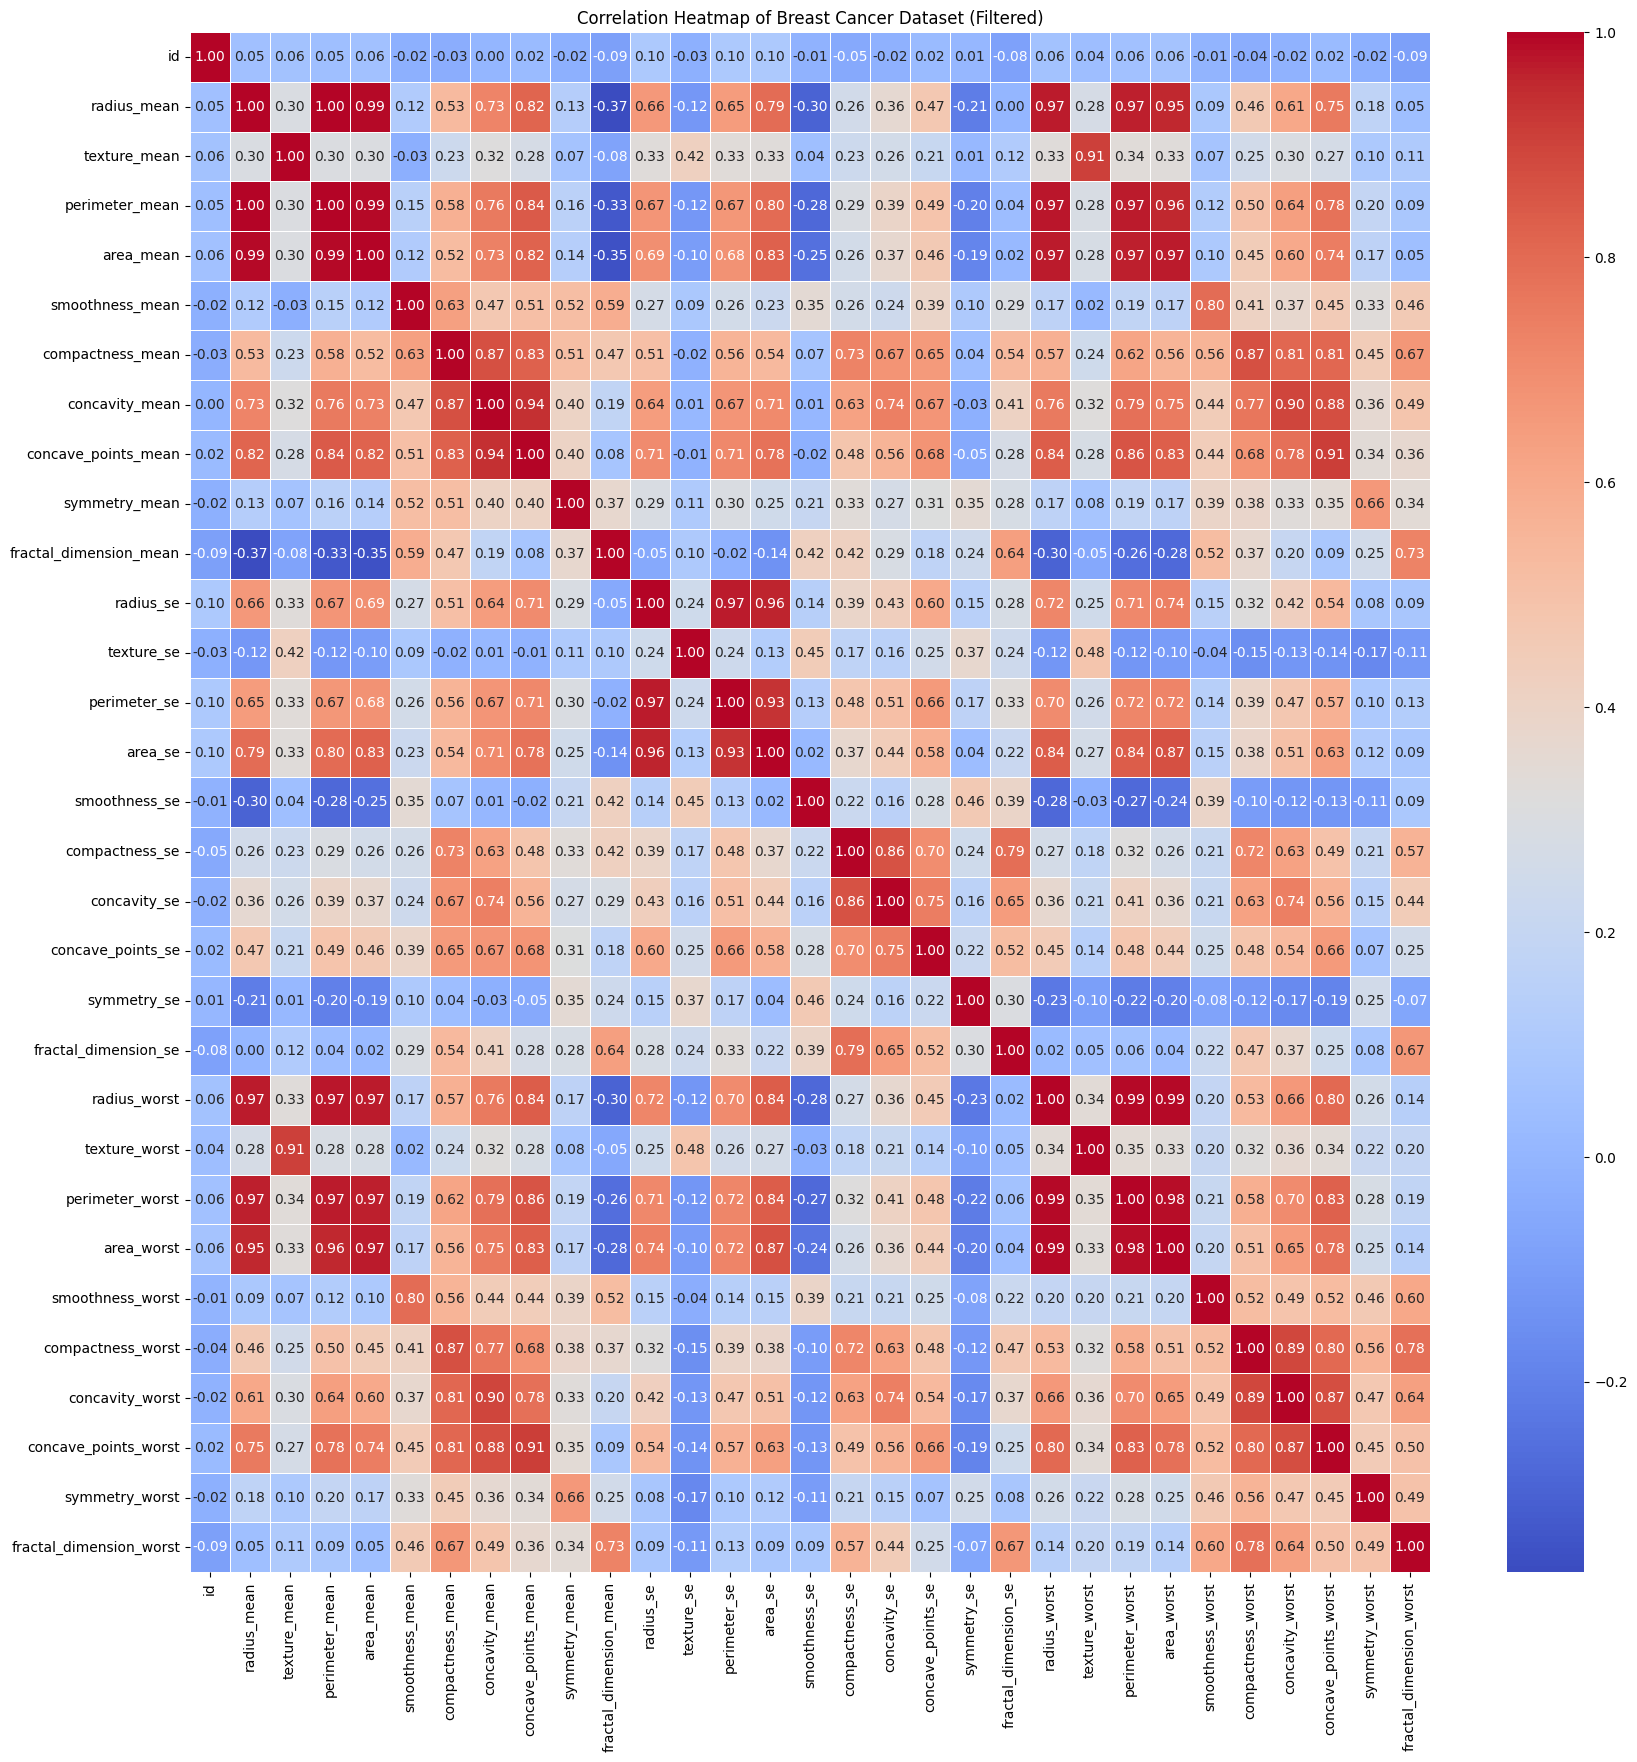

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

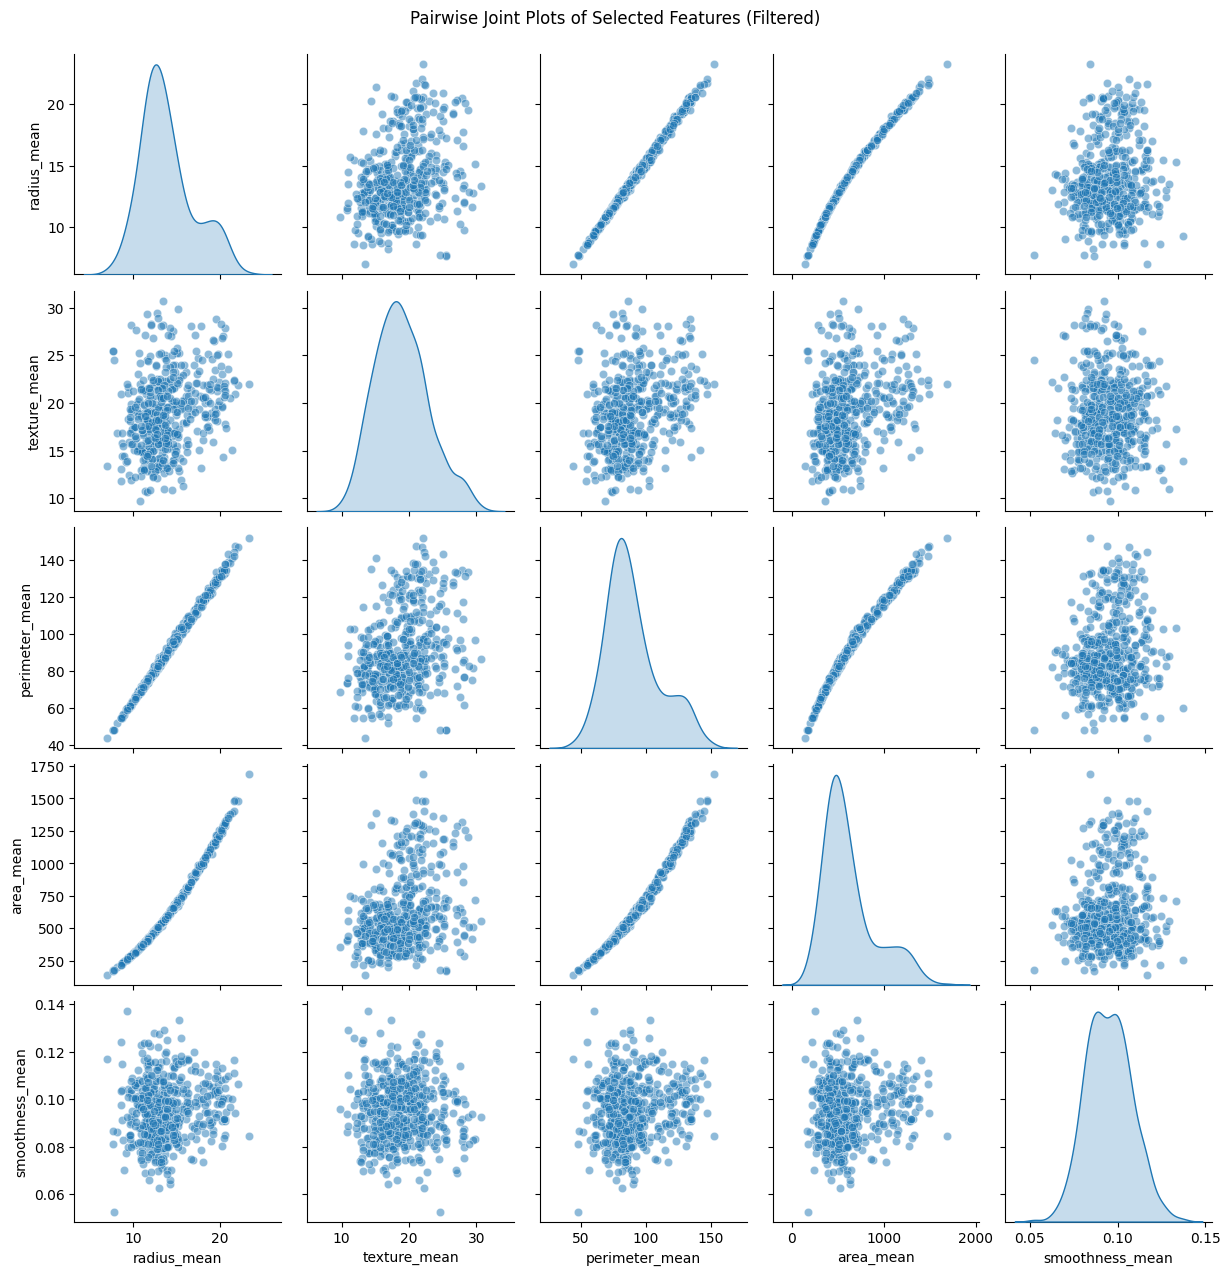

In [45]:
plt.figure(figsize=(20, 20))
sns.heatmap(c_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Dataset (Filtered)')
plt.show()

# Create pairwise joint plots for selected features using filtered data
pairplot_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(c_data[pairplot_features], diag_kind='kde', plot_kws={'alpha': 0.5}, palette='husl')
plt.suptitle('Pairwise Joint Plots of Selected Features (Filtered)', y=1.02)
plt.show()

Feature selection

In [46]:
# Feature Selection and Engineering
domain_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                   'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean',
                   'symmetry_mean', 'fractal_dimension_mean',
                   'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
                   'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
                   'symmetry_worst', 'fractal_dimension_worst']
X = c_data.drop(columns=['id', 'diagnosis'])
y = c_data['diagnosis']
X_domain = X[domain_features]

# Normalization/Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_domain)

# Dimensionality Reduction using PCA
num_components = 10
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize SVM classifier and train the model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the testing set and evaluate the model
y_pred = svm.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           B       0.98      1.00      0.99        62
           M       1.00      0.97      0.99        38

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
[[62  0]
 [ 1 37]]


Classification Report:
Precision: Precision measures the accuracy of the positive predictions. For class 'B' (benign tumors), the precision is 0.98, indicating that 98% of tumors predicted as benign are actually benign. For class 'M' (malignant tumors), the precision is 1.00, meaning that 100% of tumors predicted as malignant are actually malignant.

Recall: Recall (or sensitivity) measures the proportion of actual positives that are correctly identified by the model. For class 'B', the recall is 1.00, indicating that 100% of actual benign tumors are correctly identified. For class 'M', the recall is 0.97, meaning that 97% of actual malignant tumors are correctly identified.

F1-score: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For class 'B', the F1-score is 0.99, and for class 'M', it is 0.99.

Support: Support indicates the number of samples for each class in the testing set.

Confusion Matrix: The confusion matrix provides a tabular summary of the actual vs. predicted classifications:

True Negative (TN): The number of benign tumors correctly predicted as benign (62).

False Positive (FP): The number of benign tumors incorrectly predicted as malignant (0).

False Negative (FN): The number of malignant tumors incorrectly predicted as benign (1).

True Positive (TP): The number of malignant tumors correctly predicted as malignant (37).

This classification report and confusion matrix demonstrate the high performance of the SVM model in classifying breast tumors as benign or malignant. The model achieved high precision, recall, and F1-score for both classes, with a high overall accuracy of 99%.